# ZSU Project 1 - EDA and Clustering

- **Martin Minařík**
- **20.12.2023**
- **Colab:** [https://colab.research.google.com/drive/1U7lr9OIb_40wTbyWcvIY5mPZ-orO1lCI?usp=sharing](https://colab.research.google.com/drive/1U7lr9OIb_40wTbyWcvIY5mPZ-orO1lCI?usp=sharing)

### 5 - Wine Dataset for Clustering

- Zdroj: [https://homel.vsb.cz/~svo0175/zsu_05_wine_cluster.zip](https://homel.vsb.cz/~svo0175/zsu_05_wine_cluster.zip)

- Adaptovaný z [https://archive.ics.uci.edu/dataset/109/wine](https://archive.ics.uci.edu/dataset/109/wine)

- Kaggle: [https://www.kaggle.com/harrywang/wine-dataset-for-clustering](https://www.kaggle.com/harrywang/wine-dataset-for-clustering)

- **Odebrána informace o typech vín** pro nesupervizované učení.

- Tato data jsou výsledkem chemické analýzy vín pěstovaných ve stejném regionu v Itálii, ale pocházejících z **tří různých odrůd vinné révy**.

- **Atributy jsou:**

    - **Alcohol**

    - **Malic acid**
      
      - Jablečná kyselina.

      - Jednou z hlavních organických kyselin přítomných v hroznech a víně.

      - Během procesu zrání hroznů a fermentace se jablečná kyselina přeměňuje na kyselinu mléčnou nebo se rozkládá na jiné látky, což ovlivňuje chuť a strukturu vína.

      - Může ovlivňovat celkový dojem acidity

    - **Ash**

      - Zbytek minerálních látek, které zůstanou po kompletním vypaření vody a spálení vína při vysokých teplotách.
    
    - **Alcalinity of ash**

      - Obvykle měří jako alkalita extrahovaná z popela zbytku spáleného vína.

      - Tento parametr může poskytnout informace o celkovém obsahu minerálních látek a přítomnosti zásaditých látek ve víně.
    
    - **Magnesium**

      - Hořčík
    
    - **Total phenols**

      - Celkové fenoly.
    
    - **Flavanoids**

      - Skupinou polyfenolů nalezených v hroznech a víně
      - Mají významný vliv na charakteristiku a vlastnosti vína. Tato rozsáhlá skupina zahrnuje různé látky, jako jsou anthokyaniny (které **přispívají k barvě červených vín**), flavonoly a flavonony.
    
    - **Nonflavanoid phenols**

      - Skupinou polyfenolů nacházejících se v hroznech a víně.

      - Mohou ovlivňovat strukturu, chuť a barvu vína a jsou významnou součástí jeho složení, přispívající k zdravotním a organoleptickým vlastnostem vína.

    - **Proanthocyanins**

      - Kondenzované třísloviny nebo třísloviny založené na flavanolech.

      - Látky s vysokou antioxidační aktivitou, které mohou ovlivnit barvu, chuť a strukturu vína.
    
    - **Color intensity**

      - Barevná intenzita.

    - **Hue**

      - Barevný odstín.
    
    - **OD280/OD315 of diluted wines**
      
      - Zkratka pro optickou hustotu při vlnové délce 280 nanometrů. V kontextu vína se obvykle používá jako měření absorpce světla při této konkrétní vlnové délce.

      - UV světlo
    
    - **Proline**

      - Aminokyselina

      - Vyšší obsah prolínu ve vínu může přispět k plnější textuře a může mít vliv na vnímanou chuťovou složku vína.

# Import modules

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics, sklearn.mixture
import matplotlib.pyplot as plt
import seaborn as sns

# Načtení datasetu

In [ ]:
def load_wine_data():
    return pd.read_csv(
    'wine-clustering.csv')

df = load_wine_data()

# 📊 Exploration of the data

In [ ]:
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [ ]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

## Kolik je zde záznamů

In [ ]:
df.shape

(178, 13)

## Jsou zde nějaké NA hodnoty?

In [ ]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

## Počty unikátních hodnot?

In [ ]:
unique_series = df.nunique().sort_values()
unique_series

Nonflavanoid_Phenols     39
Magnesium                53
Ash_Alcanity             63
Hue                      78
Ash                      79
Total_Phenols            97
Proanthocyanins         101
Proline                 121
OD280                   122
Alcohol                 126
Flavanoids              132
Color_Intensity         132
Malic_Acid              133
dtype: int64

<Axes: >

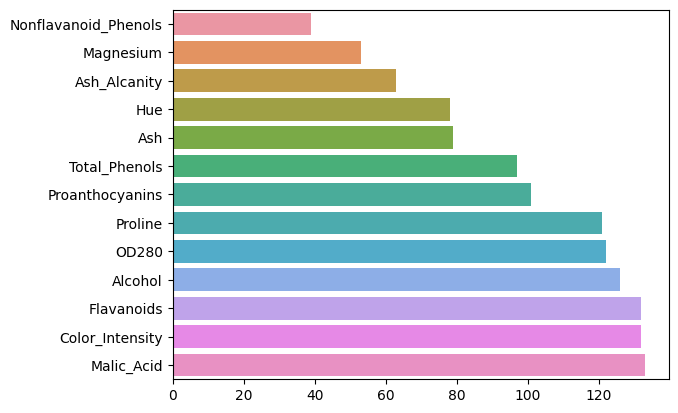

In [ ]:
sns.barplot(x=unique_series.values, y=unique_series.index)

### Můžeme nějak kategorizovat Nonflavanoid_Phenols?
- 39 unikátních hodnot ze 178
- spíše ne, lepší bude to nechat být

<Axes: xlabel='Nonflavanoid_Phenols', ylabel='count'>

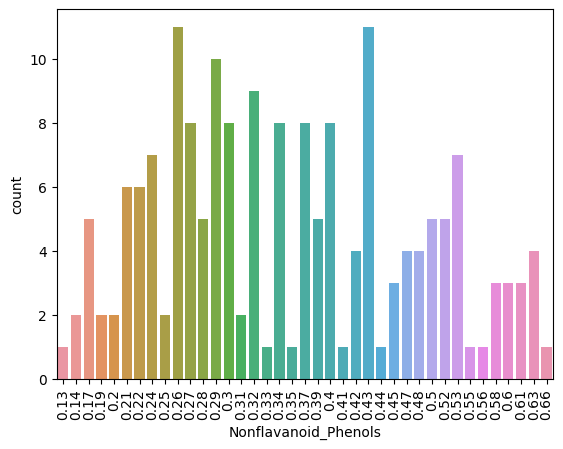

In [ ]:
plt.xticks(rotation=90)
sns.countplot(data=df, x="Nonflavanoid_Phenols")

## Měřítko u Hue

- Popis datasetu je pro tento sloupec nedostačující

- U odstínu bychom očekávali spíše měřítko hodnot 0 až 1

- Nevíme s jistotou jestli zahrnuje celé barevné spektrum, nebo jen část, ale asi lze předpokládat jen část


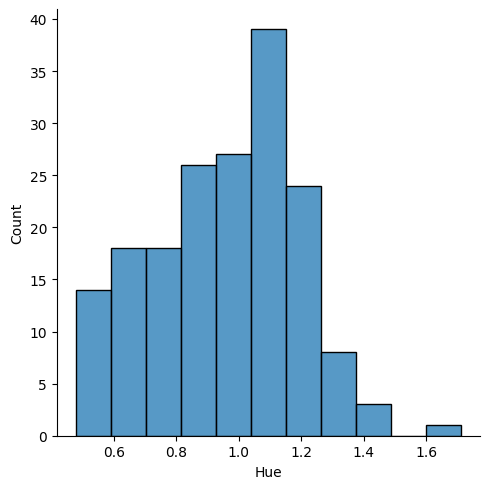

In [ ]:
sns.displot(data=df, x='Hue')

## Korelace

  - Zajímává ja **nízká korelace "Magnesium" ke sloupcům "Ash" a "Ash_Alcanity"**, ve kterých by se měl projevit počet minerálů

  - Podle vysoké **korelace mezi "Flavanoids" a "Total_Phenols"** je možné určit, že flavanoidy patři do skupiny fenolů bez znalosti chemie

  - Podle **korelace  mezi "OD280" a "fenoly"** lze říct, že fenoly ovlivňují propustnost UV světla

<Axes: >

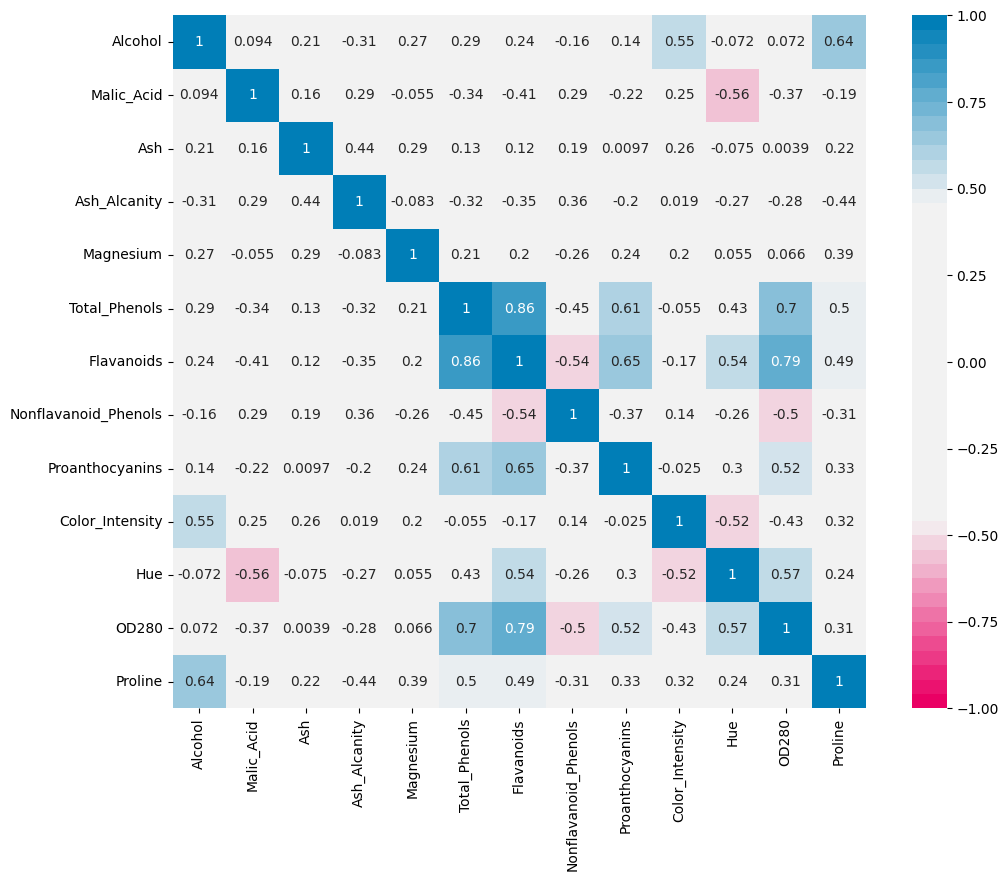

In [ ]:
pallete = sns.diverging_palette(0,240, s=100, sep=120, as_cmap=False, n=48)

plt.figure(figsize=(12, 9))
sns.heatmap(data=df.corr(), cmap=pallete, vmin=-1, vmax=1, square=True,
            annot=True)

# Clustering

## Data preprocessing

- Máme pouze číselné, nekategorické hodnoty
  - není třeba enkodovat

- Děláme K-Means, je třeba provést scale sloupců

In [ ]:
# columns = ["OD280", 'Flavanoids', 'Total_Phenols', 'Proanthocyanins', 'Hue', 'Color_Intensity', 'Proline', 'Alcohol']

scaler = sklearn.preprocessing.StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled.head()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1  0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2  0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3  1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4  0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    1.034819             -0.659563         1.224884         0.251717   
1    0.733629             -0.820719        -0.544721        -0.293321   
2    1.215533             -0.498407         2.135968         0.269020   
3    1.466525             -0.981875         1.032155         1.186068   
4    0.663351              0.226796         0.401404        -0.319276   

        Hue     OD280   Proline  
0  0.362177  1.847920  1.013009  
1  0.406051  1.113449  0.965242  
2  0.318304  0.788587  1.395148  
3 -0.427544  1.184071  2.334574  
4  0.362177  0.449601 -0.037874

## K-Means clustering

### Kolik clusterů?

- podle elbow metody 3 clustery
- podle nejvyššího silhouette score 3, případně 2
- podle popisu datasetu jsou 3 odrůdy
- **podle průniku předchozích bodů, 3 clustery**



In [ ]:
def calc_kmeans_scores(X_values, max_clusters=2, random_state=13):
  clustering_scores = []
  for n in range(2, max_clusters + 1):
      clustering = sklearn.cluster.KMeans(n_clusters=n, random_state=random_state, n_init=10).fit(X_values)
      clustering_scores.append({
          'n': n,
          'sse': clustering.inertia_,
          'silhouette': sklearn.metrics.silhouette_score(X_values, clustering.labels_)
      })

  return pd.DataFrame.from_dict(clustering_scores, orient='columns').set_index('n')


In [ ]:
df_clustering_scores = calc_kmeans_scores(df_scaled.values, max_clusters=10)
df_clustering_scores

sse  silhouette
n                          
2   1658.758852    0.259317
3   1277.928489    0.284859
4   1175.216677    0.258447
5   1101.557335    0.234490
6   1044.127229    0.203507
7    993.006545    0.152411
8    951.542062    0.132436
9    900.390706    0.148991
10   855.134900    0.157126

Text(0.5, 1.0, 'Elbow method')

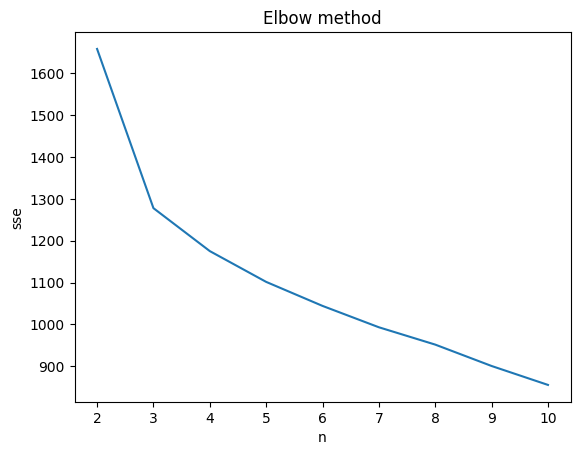

In [ ]:
sns.lineplot(data=df_clustering_scores, y='sse', x='n').set_title('Elbow method')

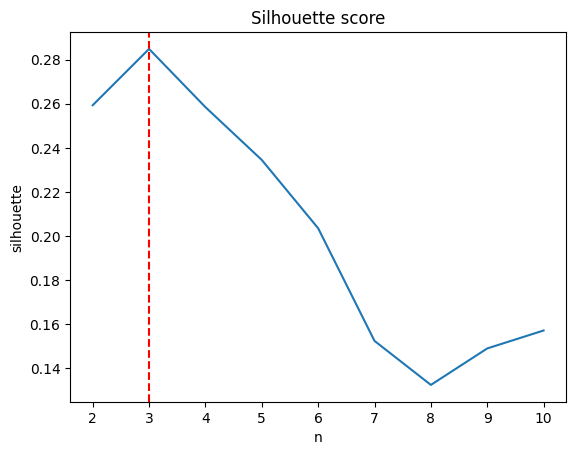

In [ ]:
sns.lineplot(data=df_clustering_scores, y='silhouette', x='n').set_title('Silhouette score')
plt.axvline(x = df_clustering_scores.silhouette.idxmax(),
            ymin = 0, ymax = 1,
            linestyle='dashed',
            color='red')

### 3 clustery

In [ ]:
clustering = sklearn.cluster.KMeans(n_clusters= 3, random_state=13, n_init=10).fit(df_scaled.values)
df_clustering_kmeans = df.copy()
df_clustering_kmeans["cluster_id"] = clustering.labels_

<Axes: xlabel='cluster_id', ylabel='count'>

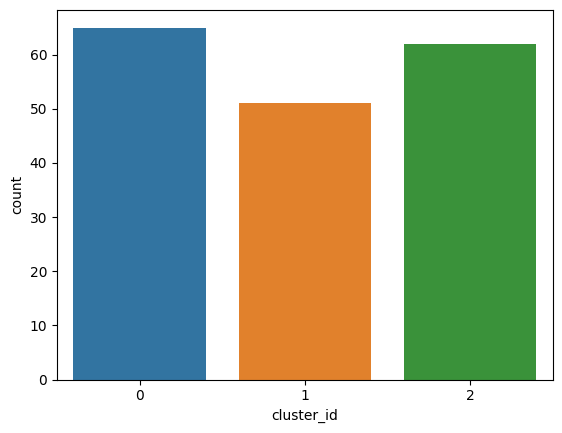

In [ ]:
sns.countplot(data=df_clustering_kmeans, x='cluster_id')

In [ ]:
df_clustering_kmeans.cluster_id.value_counts()

0    65
2    62
1    51
Name: cluster_id, dtype: int64

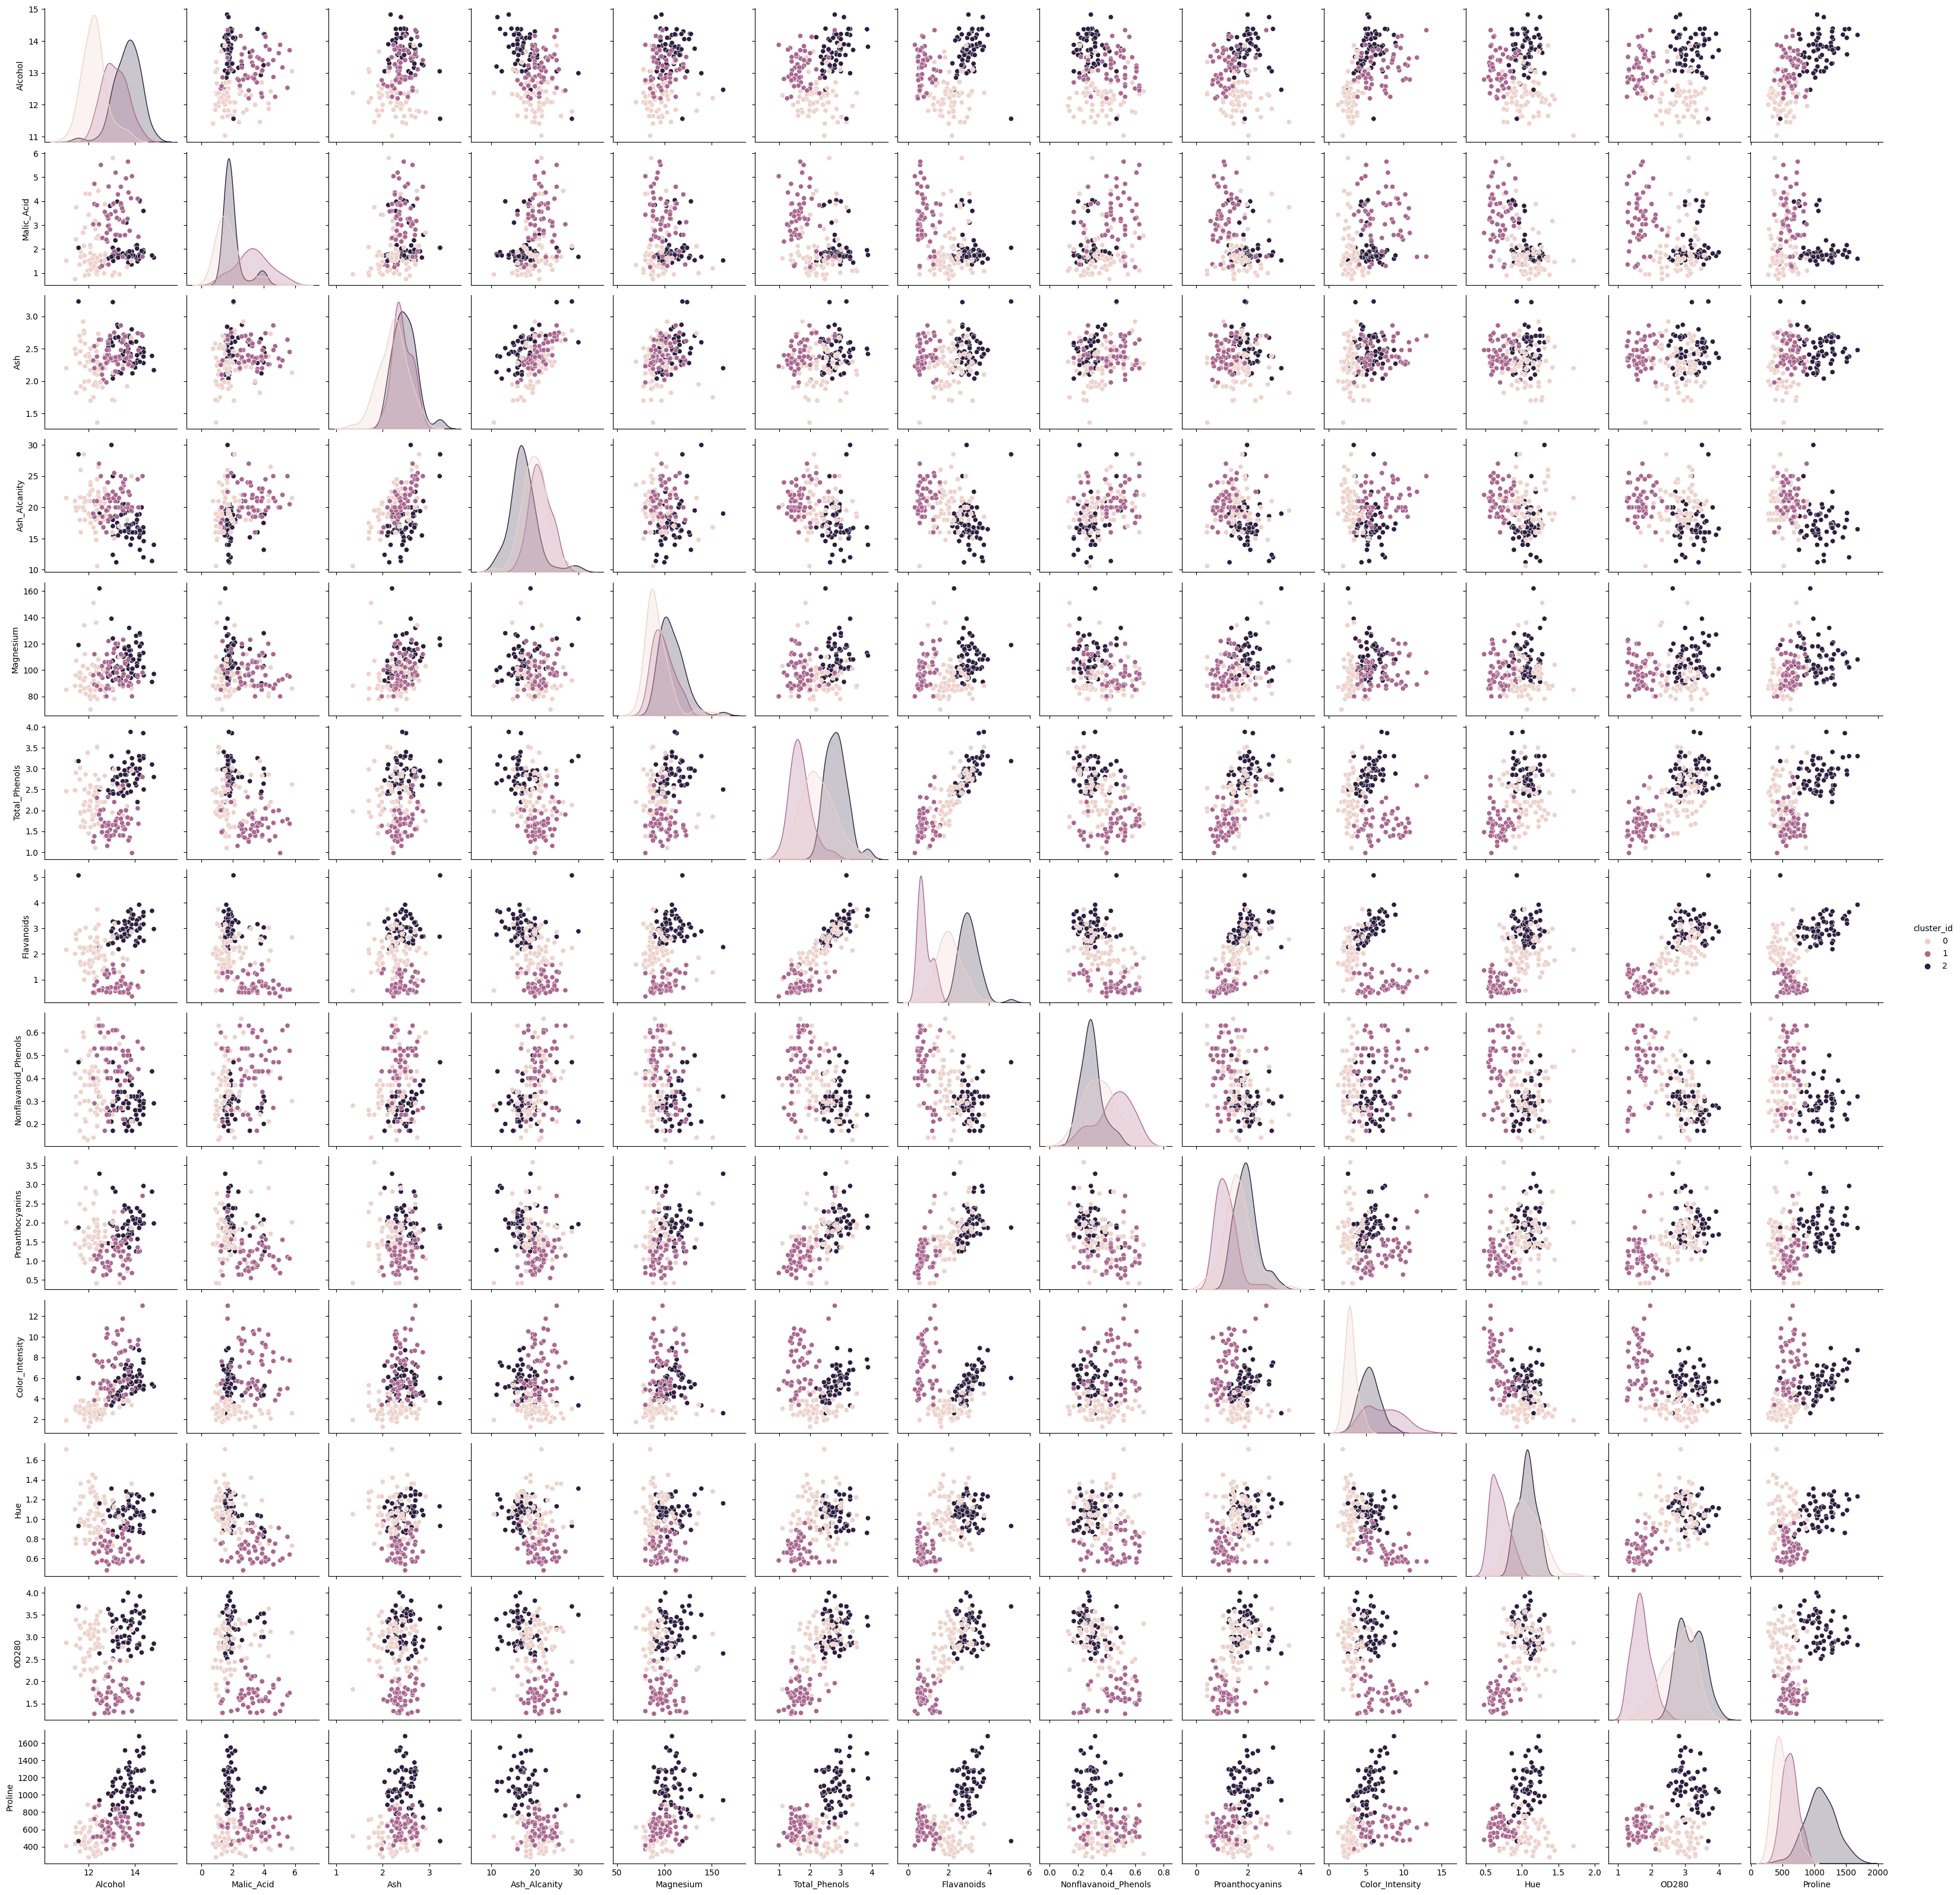

In [ ]:
sns.pairplot(df_clustering_kmeans, hue='cluster_id')

<Axes: xlabel='cluster_id', ylabel='Alcohol'>

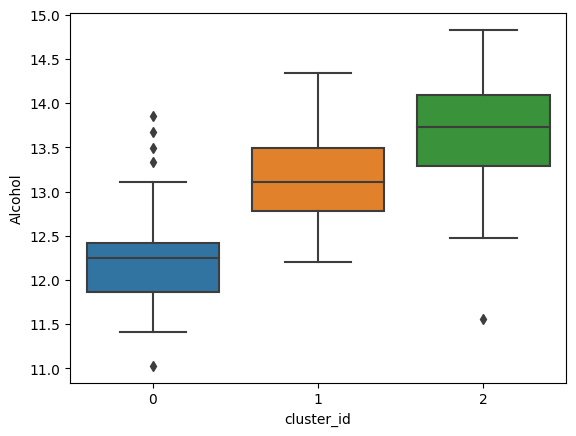

In [ ]:
sns.boxplot(df_clustering_kmeans, y="Alcohol", x="cluster_id")

<Axes: xlabel='cluster_id', ylabel='Flavanoids'>

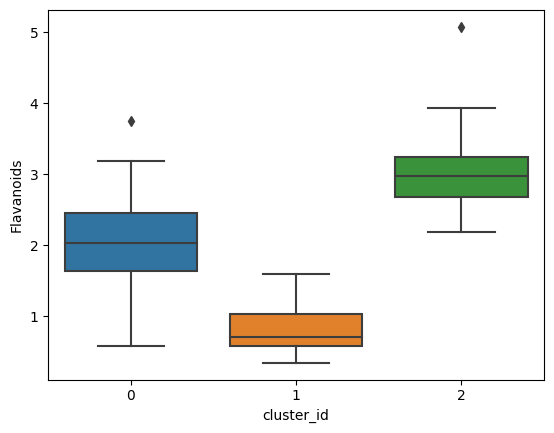

In [ ]:
sns.boxplot(df_clustering_kmeans, y="Flavanoids", x="cluster_id")

<Axes: xlabel='cluster_id', ylabel='Malic_Acid'>

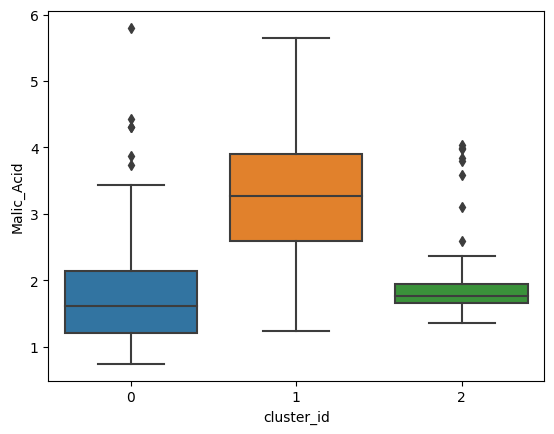

In [ ]:
sns.boxplot(df_clustering_kmeans, y="Malic_Acid", x="cluster_id")

<Axes: xlabel='cluster_id', ylabel='OD280'>

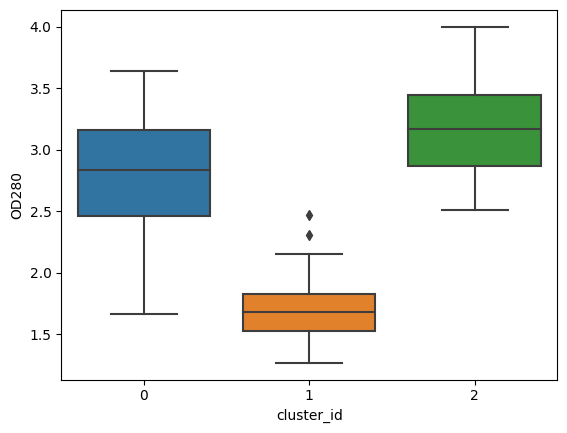

In [ ]:
sns.boxplot(df_clustering_kmeans, y="OD280", x="cluster_id")

<Axes: xlabel='Hue', ylabel='Color_Intensity'>

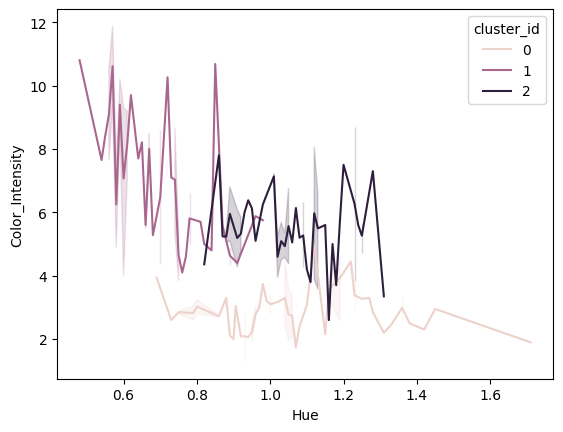

In [ ]:
sns.lineplot(df_clustering_kmeans, x="Hue", y="Color_Intensity", hue="cluster_id")

<Axes: xlabel='cluster_id', ylabel='Hue'>

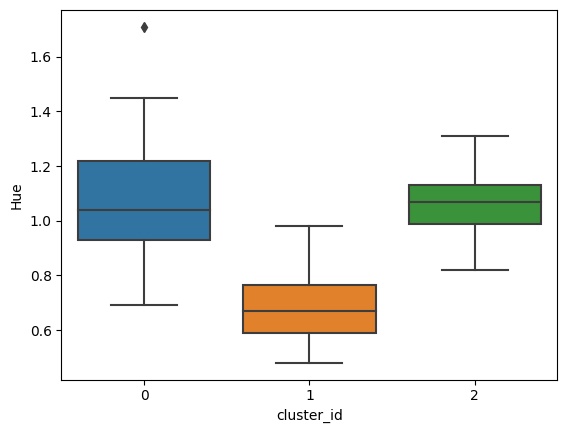

In [ ]:
sns.boxplot(df_clustering_kmeans, y="Hue", x="cluster_id")

<Axes: xlabel='cluster_id', ylabel='Color_Intensity'>

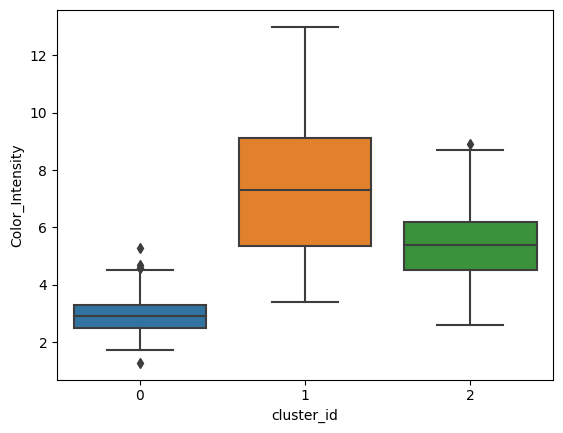

In [ ]:
sns.boxplot(df_clustering_kmeans, y="Color_Intensity", x="cluster_id")

<Axes: xlabel='Hue', ylabel='Flavanoids'>

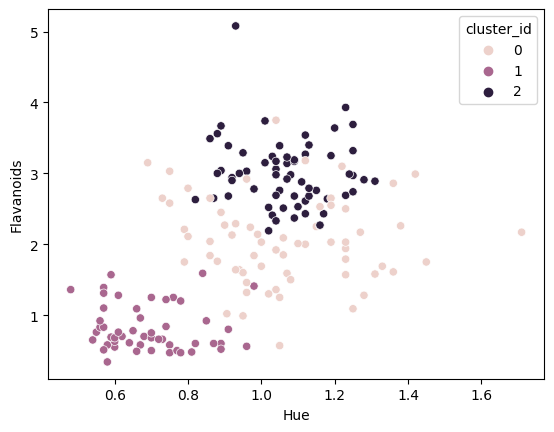

In [ ]:
sns.scatterplot(df_clustering_kmeans, x='Hue', y='Flavanoids', hue='cluster_id')


<Axes: xlabel='cluster_id', ylabel='Proline'>

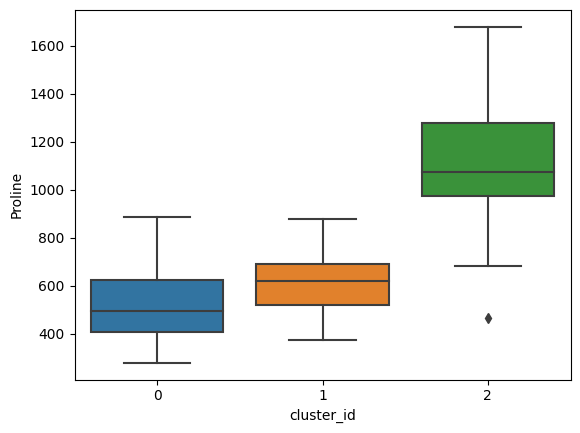

In [ ]:
sns.boxplot(df_clustering_kmeans, y="Proline", x="cluster_id")

### **Shrnutí**

- Počet clusterů podle elbow metody a silhouette score odpovídá počtu odrůd z popisu datasetu

- Clustery se podle velikosti liší minimálně

- **Cluster 0**

  - Velikost: 65

  - Nejméně alkoholu

  - Malá barevná intenzita

  - Nejméně kyselé(podle jablečné kyseliny, malic acid)

  - Podle "Flavanoids" by se mělo jednat o červené víno


- **Cluster 1**

  - Velikost: 62

  - Střední podle alkoholu

  - Barevně nejintenzivnější
  
  - Nejkyselejší(podle jablečné kyseliny, malic acid)

  - Propouští nejméně UV světla

- **Cluster 2**

  - Velikost: 51

  - Nejvíce alkoholu

  - Podle Prolinu nejchutnější víno s nejlepší texturou

  - Podle "Flavanoids" by se mělo jednat o červené víno

---

## Gaussian Mixture

### Kolik clusterů?

- Podle silhouette score 3, případně 2
- Podle BIC 2, případně 3
- Podle počtu odrůd z popisu datasetu 3
- Podle průniku volím spíše 3

In [ ]:
def calc_gauss_scores(X_values, max_clusters=2, random_state=13):
  clustering_scores = []
  for n in range(2, max_clusters + 1):
      clustering = sklearn.mixture.GaussianMixture(n_components=n, random_state=random_state, n_init=10).fit(X_values)
      clustering_scores.append({
          'n': n,
          'bic': clustering.bic(X_values),
          'silhouette': sklearn.metrics.silhouette_score(X_values, clustering.predict(X_values)),
      })

  return pd.DataFrame.from_dict(clustering_scores, orient='columns').set_index('n')

In [ ]:
df_clustering_scores = calc_gauss_scores(df_scaled.values, max_clusters=10)
df_clustering_scores

bic  silhouette
n                          
2   5608.349837    0.268505
3   5806.285121    0.284421
4   6021.752002    0.257120
5   5894.644111    0.221297
6   6032.462843    0.186106
7   6332.823231    0.200349
8   6585.880736    0.131618
9   6452.022063    0.180842
10  6482.857366    0.092013

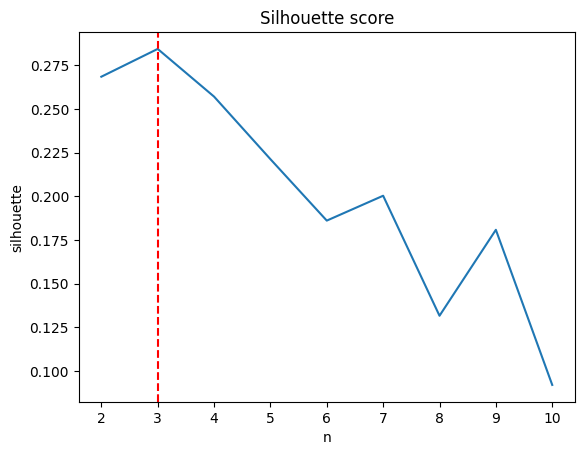

In [ ]:
sns.lineplot(data=df_clustering_scores, y='silhouette', x='n').set_title('Silhouette score')
plt.axvline(x = df_clustering_scores.silhouette.idxmax(),
            ymin = 0, ymax = 1,
            linestyle='dashed',
            color='red')

Text(0.5, 1.0, 'BIC')

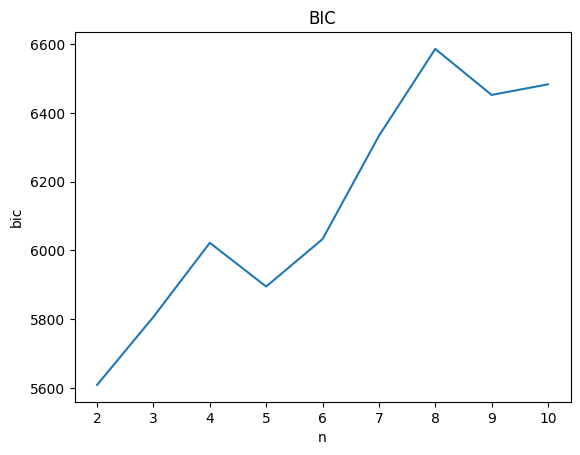

In [ ]:
sns.lineplot(data=df_clustering_scores, y='bic', x='n').set_title('BIC')

### 3 clustery

In [ ]:
clustering = sklearn.mixture.GaussianMixture(n_components=3, random_state=13, n_init=10).fit(df_scaled.values)
df_clustering_gauss_mix = df.copy()
df_clustering_gauss_mix["cluster_id"] = clustering.predict(df_scaled.values)

<Axes: xlabel='cluster_id', ylabel='count'>

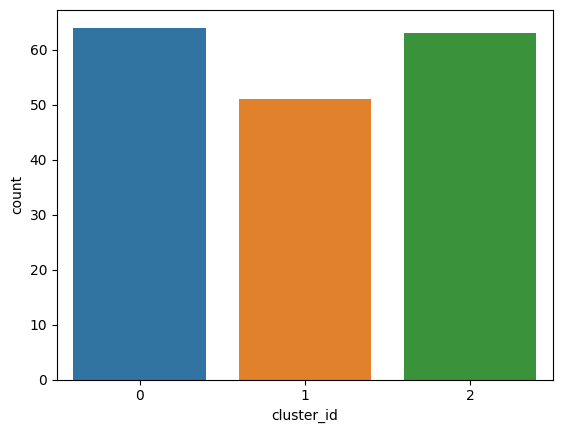

In [ ]:
sns.countplot(data=df_clustering_gauss_mix, x='cluster_id')

In [ ]:
df_clustering_gauss_mix.cluster_id.corr(df_clustering_kmeans.cluster_id)

0.9528339603235011

In [ ]:
(df_clustering_gauss_mix.cluster_id != df_clustering_kmeans.cluster_id).sum()

3

<Axes: xlabel='cluster_id', ylabel='Alcohol'>

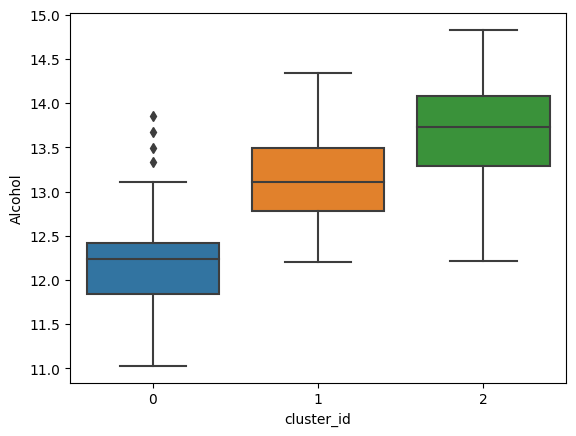

In [ ]:
sns.boxplot(df_clustering_gauss_mix, y="Alcohol", x="cluster_id")

### 2 clustery

In [ ]:
clustering = sklearn.mixture.GaussianMixture(n_components=2, random_state=13, n_init=10).fit(df_scaled.values)
df_clustering_gauss_mix_2 = df.copy()
df_clustering_gauss_mix_2["cluster_id"] = clustering.predict(df_scaled.values)

In [ ]:
df_clustering_gauss_mix_2.cluster_id.value_counts()

0    125
1     53
Name: cluster_id, dtype: int64

<Axes: xlabel='cluster_id', ylabel='count'>

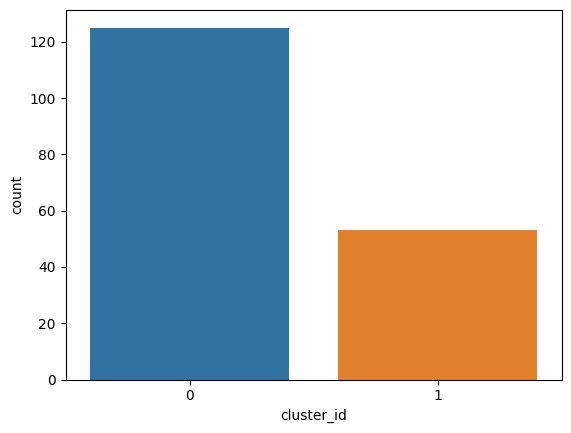

In [ ]:
sns.countplot(data=df_clustering_gauss_mix_2, x='cluster_id')

<Axes: xlabel='cluster_id', ylabel='Color_Intensity'>

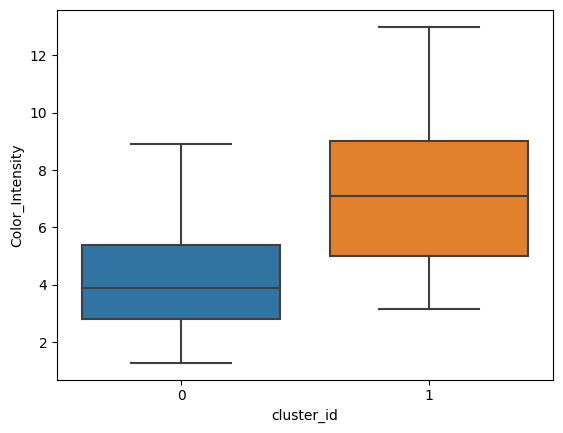

In [ ]:
sns.boxplot(df_clustering_gauss_mix_2, y='Color_Intensity', x='cluster_id')

<Axes: xlabel='Hue', ylabel='Flavanoids'>

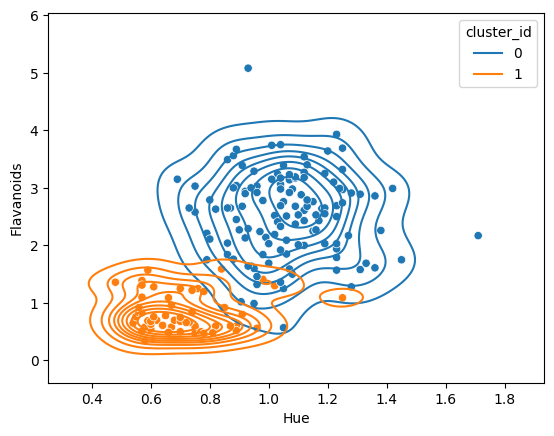

In [ ]:
sns.scatterplot(df_clustering_gauss_mix_2, x='Hue', y='Flavanoids', hue='cluster_id')
sns.kdeplot(df_clustering_gauss_mix_2, x = 'Hue', y = 'Flavanoids', hue='cluster_id')

<Axes: xlabel='cluster_id', ylabel='Flavanoids'>

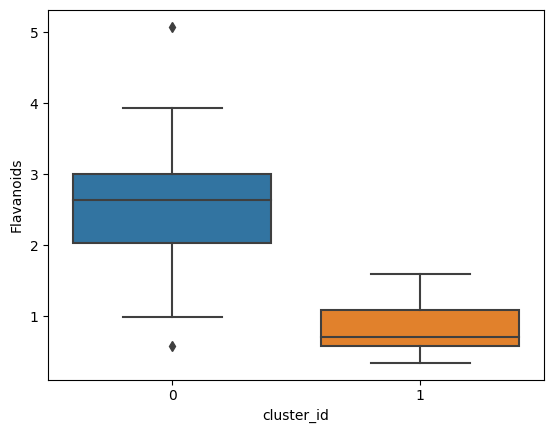

In [ ]:
sns.boxplot(df_clustering_gauss_mix_2, y="Flavanoids", x="cluster_id")

<Axes: xlabel='cluster_id', ylabel='OD280'>

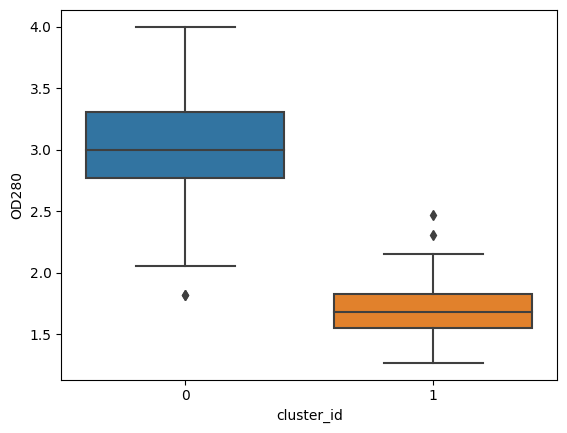

In [ ]:
sns.boxplot(df_clustering_gauss_mix_2, y='OD280', x='cluster_id')

<Axes: xlabel='cluster_id', ylabel='Malic_Acid'>

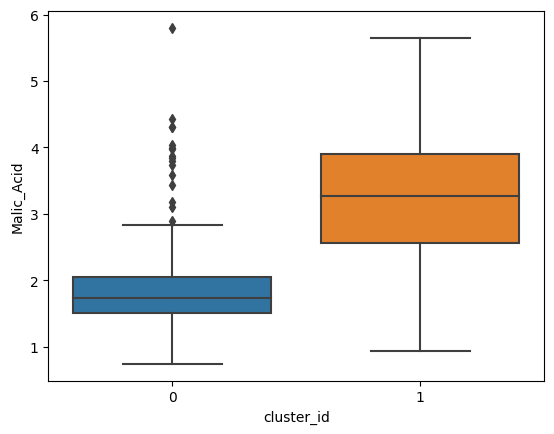

In [ ]:
sns.boxplot(df_clustering_gauss_mix_2, y="Malic_Acid", x="cluster_id")

In [ ]:
sns.scatterplot(df_clustering_gauss_mix_2, x='Hue', y='OD280', hue='cluster_id')

### **Shrnutí**

- Více to táhlo k 2 clusterům oproti K-Means

- **3 clustery**
  - **Korelace 0.9528** s clustery u K-Means

  - Pouze 3 rozdílně umístěné záznamy v clusterech oproti clusterům u K-Means

  - **Viz shrnutí u K-Means, nemělo by se lišit**

- **2 clustery**

  - **Cluster 0**
    - Červenější vína(podle Flavanoids)
    - Početnější cluster
    - propouští více uv světla

  - **Cluster 1**
    - Barevně intenzivnější
    - propouští méně uv světla
    - Více mléčné kyseliny, více kyselejší



# Celkové shrnutí

- **Dataset**
  - Hodilo by se více sloupců, například světlost, stáří, ...

  - **Těžko se s tímto datasetem pracovalo** bez většího porozumění u tak dost specifických zkoumaných vlastností
    - těžké rozhodnout jestli hodnoty byly velké nebo malé k vínu obecně

  - **Chybějící popisky sloupců**

    - Nejasné měřítka

    - U odstínu, **"Hue"**, největší problém

      - silně nejasné měřítko

      - V kombinaci s color intenzity se těžko uchopila barva jednotlivých vín

  - Zajímává ja **nízká korelace "Magnesium" ke sloupcům "Ash" a "Ash_Alcanity"**, ve kterých by se měl projevit počet minerálů

  - Podle vysoké **korelace mezi "Flavanoids" a "Total_Phenols"** je možné určit, že flavanoidy patři do skupiny fenolů bez chemických znalostí

  - Podle **korelace  mezi "OD280" a "fenoly"** lze říct, že fenoly ovlivňují propustnost UV světla

- **Data preprocessing**

  - bylo potřeba jenom udělat scale, v mém případě jsem zvolil **StandardScaler**

  - **Slopce "Ash", "Ash_Alcanity" a "Magnesium" by se mohli vynechat** vzhledem k nízkým korelacím

- **K-Means clustering**

  - Pomocí elbow metody a silhouette to **odpovídalo 3 clusterům**, což odpovídá počtu odrůd v popisu datasetu

  - Viz **Clustering -> K-Means clustering -> <u>Shrnutí</u>**

- **Gaussian mixture**

  - Nebylo možné použít elbow metodu

  - Podle BIC a silhouette skore to mírně táhlo více k 2 clusterům než ke 3
  
  - Při 3 clusterech byl skoro nulový rozdíl oproti K-means

  - Při 2 clusterech reprezentoval 1 z clusterů červenější vína podle počtu Flavanoidů

  - Viz **Clustering -> Gaussian Mixture -> <u>Shrnutí</u>**



